In [29]:
import numpy as np
import pandas as pd
from arch.unitroot import ADF
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
abspath = '/Users/alexcappadona/Downloads/'
data = pd.read_excel(abspath + 'CrudeSpotFutures.xlsx', index_col=0)
data.head()

,futures,spot
Date,,
2000-01-04,25.55,25.56
2000-01-05,24.91,24.65
2000-01-06,24.78,24.79
2000-01-07,24.22,24.79
2000-01-10,24.67,24.71


In [30]:
data.tail()

,futures,spot
Date,,
2020-12-24,48.23,48.18
2020-12-28,47.62,47.50
2020-12-29,48.00,47.85
2020-12-30,48.40,48.24
2020-12-31,48.52,48.35


In [31]:
data.describe()

,futures,spot
count,5256.000000,5256.000000
mean,60.912597,60.866292
std,26.136736,26.147000
min,10.010000,8.910000
25%,39.687500,39.557500
50%,57.355000,57.305000
75%,81.250000,81.242500
max,145.290000,145.310000


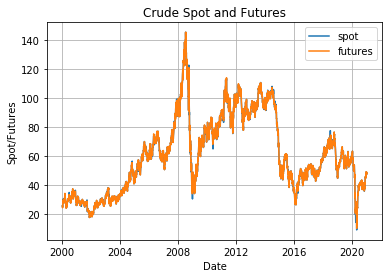

In [32]:
plt.figure(1)
plt.plot(data['spot'], label='spot')
plt.plot(data['futures'], label='futures')
plt.xlabel('Date')
plt.ylabel('Spot/Futures')
plt.title('Crude Spot and Futures')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
# compute log returs
# p1: futures
# p2: spot
data['p1']=np.log(data['futures'])
data['p2']=np.log(data['spot'])
data['dp1']=data['p1'].diff()
data['dp2']=data['p2'].diff()
data=data.dropna()
data.head()

,futures,spot,p1,p2,dp1,dp2
Date,,,,,,
2000-01-05,24.91,24.65,3.215269,3.204777,-0.025368,-0.036252
2000-01-06,24.78,24.79,3.210037,3.210440,-0.005232,0.005663
2000-01-07,24.22,24.79,3.187179,3.210440,-0.022858,0.000000
2000-01-10,24.67,24.71,3.205588,3.207208,0.018409,-0.003232
2000-01-11,25.77,25.69,3.249211,3.246102,0.043623,0.038894


In [34]:
# Are the prices stationary?
res1=ADF(data['p1'], lags=10)
print(res1.summary())
res2=ADF(data['p2'], lags=10)
print(res2.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.245
P-value                         0.190
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.255
P-value                         0.187
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [35]:
formula = 'p1 ~ p2'
results = smf.ols(formula, data).fit()
print(results.summary())
residuals = results.resid

                            OLS Regression Results                            
Dep. Variable:                     p1   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.388e+06
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:01:23   Log-Likelihood:                 15313.
No. Observations:                5255   AIC:                        -3.062e+04
Df Residuals:                    5253   BIC:                        -3.061e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0083      0.002      5.210      0.0

In [36]:
res=ADF(residuals, lags=10)
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                -19.295
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [37]:
# are the returns stationary?
res1a=ADF(data['dp1'], lags=10)
print(res1a.summary())
res2a=ADF(data['dp2'], lags=10)
print(res2a.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                -23.060
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -24.011
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


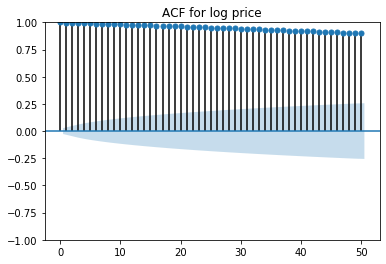

In [38]:
# Correlogram for price
smt.graphics.plot_acf(data['p1'], lags=50)
plt.title('ACF for log price')
plt.show()

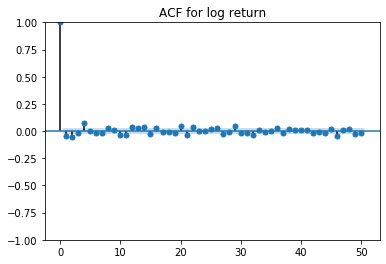

In [39]:
# Correlogram for returns
smt.graphics.plot_acf(data['dp1'], lags=50)
plt.title('ACF for log return')
plt.show()

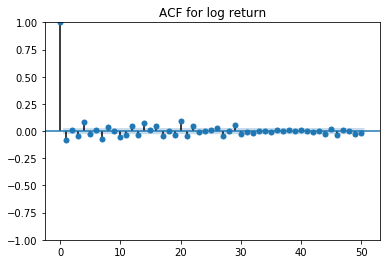

In [40]:
# Correlogram for returns
smt.graphics.plot_acf(data['dp2'], lags=50)
plt.title('ACF for log return')
plt.show()

In [41]:
# Ljung-Box autocorrelation test
name=['Ljung-Box statistic', 'p-value']
test=sms.acorr_ljungbox(data['dp1'], lags=10)
lzip(name,test)

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

In [42]:
test

,lb_stat,lb_pvalue
1,10.328884,1.309644e-03
2,25.766173,2.540661e-06
3,27.668653,4.262699e-06
4,56.566531,1.525293e-11
5,56.687189,5.866163e-11
6,58.612012,8.611194e-11
7,60.743605,1.072263e-10
8,64.316358,6.587313e-11
9,65.036814,1.419129e-10
10,72.031982,1.793775e-11


In [43]:
# Ljung-Box autocorrelation test
name=['Ljung-Box statistic', 'p-value']
test=sms.acorr_ljungbox(data['dp2'], lags=10)
lzip(name,test)

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

In [44]:
test

,lb_stat,lb_pvalue
1,39.183861,3.857155e-10
2,39.733170,2.355330e-09
3,51.007274,4.874660e-11
4,88.760163,2.414576e-18
5,93.258763,1.387920e-18
6,93.907026,4.668184e-18
7,123.883814,1.188370e-23
8,132.362820,9.155170e-25
9,132.500033,3.628180e-24
10,145.854455,2.652157e-26


In [15]:
data['dp1'].corr(data['dp2']) # correlation of spot and futures returns

0.923927040278879

In [16]:
data1=data.drop(['spot', 'futures', 'dp1', 'dp2'], axis=1) # axis=1 means columns (variables)
data1.head()

,p1,p2
Date,,
2000-01-05,3.215269,3.204777
2000-01-06,3.210037,3.210440
2000-01-07,3.187179,3.210440
2000-01-10,3.205588,3.207208
2000-01-11,3.249211,3.246102


In [17]:
# Estimate VECM
model = smt.VECM(data1, k_ar_diff=8, deterministic="co", coint_rank=1) # deterministic="co" adds an intercept
vecm_res = model.fit()
print(vecm_res.summary())
vecm_residuals = vecm_res.resid

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Det. terms outside the coint. relation & lagged endog. parameters for equation p1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.303      0.762      -0.001       0.001
L1.p1         -0.1793      0.055     -3.252      0.001      -0.287      -0.071
L1.p2          0.1237      0.053      2.330      0.020       0.020       0.228
L2.p1         -0.3229      0.053     -6.067      0.000      -0.427      -0.219
L2.p2          0.2698      0.051      5.314      0.000       0.170       0.369
L3.p1         -0.0840      0.052     -1.616      0.106      -0.186       0.018
L3.p2          0.0677      0.049      1.370      0.171      -0.029       0.165
L4.p1         -0.0004      0.049     -0.008      0.993      -0.097       0.096
L4.p2          0.0659      0.047      1.404      0.160      -0.026       0.158
L5.p1         -0.0153      0.047     -0.323      

In [18]:
vecm_residuals

array([[ 0.02762676,  0.01020916],
       [ 0.00482708,  0.01397123],
       [-0.05005284, -0.00072606],
       ...,
       [ 0.00878065,  0.00644661],
       [ 0.00699548,  0.00701397],
       [ 0.00197485,  0.00086319]])

In [50]:
dp1r=[column[0] for column in vecm_residuals] # first value of index is 0
dp2r=[column[1] for column in vecm_residuals] 

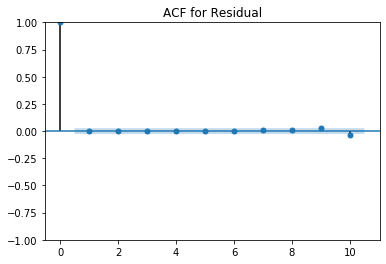

In [51]:
# Correlogram for VECM resilduals
smt.graphics.plot_acf(dp1r, lags=10)
plt.title('ACF for Residual')
plt.show()

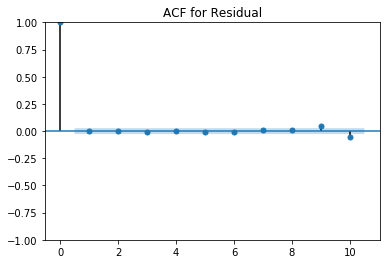

In [52]:
# Correlogram for VECM resilduals
smt.graphics.plot_acf(dp2r, lags=10)
plt.title('ACF for Residual')
plt.show()

In [58]:
# Ljung-Box autocorrelation test for residuals
name=['Ljung-Box statistic', 'p-value']
test=sms.acorr_ljungbox(dp1r, lags=10)
lzip(name,test)

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

In [59]:
test

,lb_stat,lb_pvalue
1,0.008613,0.926057
2,0.031183,0.984529
3,0.061195,0.996047
4,0.070620,0.999391
5,0.097241,0.999848
6,0.112507,0.999972
7,0.598794,0.998998
8,1.239050,0.996241
9,5.556711,0.783333
10,10.789283,0.374169


In [60]:
# Ljung-Box autocorrelation test for residuals
name=['Ljung-Box statistic', 'p-value']
test=sms.acorr_ljungbox(dp2r, lags=10)
lzip(name,test)

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

In [61]:
test

,lb_stat,lb_pvalue
1,0.027407,0.868510
2,0.028079,0.986059
3,0.110905,0.990497
4,0.135988,0.997791
5,0.452841,0.993748
6,0.614912,0.996147
7,1.124163,0.992570
8,1.456637,0.993405
9,10.886474,0.283571
10,24.019077,0.007550
